In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import math


# Excercise 6

## 1.

In [16]:
# Parameters
A = 3.0  # average rate
m = 10  # truncation point

# Truncated Poisson PMF
def truncated_poisson_pmf(i, A = A, m = m):
    c = 1 / sum((A**k / math.factorial(k)) for k in range(m + 1))
    return c * (A**i / math.factorial(i))

In [18]:
def metropolis_hastings(q, steps):
    x = 0
    samples = []
    for _ in range(steps):
        x_new = np.random.randint(0, m+1)
        acceptance_ratio = min(1, truncated_poisson_pmf(i = x_new) / truncated_poisson_pmf(i = x))
        if np.random.rand() < acceptance_ratio:
            x = x_new
        samples.append(x)
    return samples


# Generate samples
samples = metropolis_hastings(lambda x, y: 1,  10000)

Chi-squared statistic: 0.0044346473228147045
p-value: 0.9999999999999996


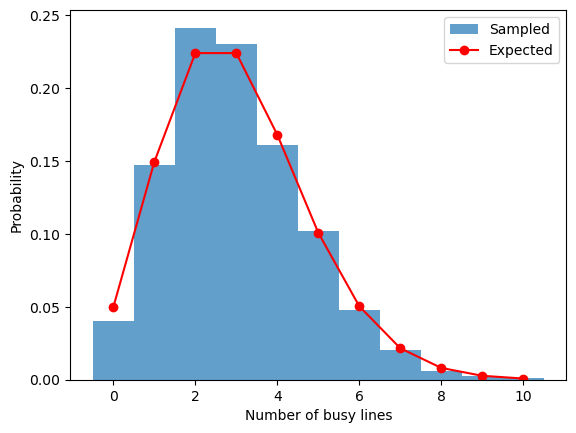

In [ ]:
# Calculate observed frequencies
observed_freq, _ = np.histogram(samples, bins=np.arange(m+2) - 0.5, density=True)

# Calculate expected frequencies
expected_freq = np.array([truncated_poisson_pmf(i, A, m) for i in range(m + 1)])

# Perform chi-squared test
chi2_stat, p_value = chisquare(observed_freq, expected_freq)

print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)

# Plot results
plt.hist(samples, bins=np.arange(m+2) - 0.5, density=True, alpha=0.7, label='Sampled')
plt.plot(np.arange(m + 1), expected_freq, 'ro-', label='Expected')
plt.xlabel('Number of busy lines')
plt.ylabel('Probability')
plt.legend()
plt.show()

## 2.

First, we define the joint probability mass function (PMF) for the truncated distribution:

In [5]:
# Parameters
A1 = 4.0  # average rate for call type 1
A2 = 4.0  # average rate for call type 2
m = 10  # truncation point

# Truncated Joint Poisson PMF
def truncated_joint_poisson_pmf(i, j, A1, A2, m):
    if i + j > m:
        return 0
    c = 1 / sum((A1**k / math.factorial(k)) * (A2**l / math.factorial(l)) for k in range(m + 1) for l in range(m + 1) if k + l <= m)
    return c * (A1**i / math.factorial(i)) * (A2**j / math.factorial(j))


We once again use metropolis hasting method to generate samples from the join distribution

In [8]:
def metropolis_hastings_joint(steps):
    i, j = 0, 0
    samples = []
    for _ in range(steps):
        i_new, j_new = np.random.randint(0, m+1), np.random.randint(0, m+1)
        if i_new + j_new <= m:
            acceptance_ratio = min(1, truncated_joint_poisson_pmf(i_new, j_new, A1=A1, A2=A2, m=m) / truncated_joint_poisson_pmf(i, j, A1=A1, A2=A2, m=m))
            if np.random.rand() < acceptance_ratio:
                i, j = i_new, j_new
        samples.append((i, j))
    return samples

# Generate samples
samples_joint = metropolis_hastings_joint(10000)    

Chi-squared statistic for i: 0.0028766402265561126
p-value for i: 1.0
Chi-squared statistic for j: 0.004043061278897258
p-value for j: 0.9999999999999997


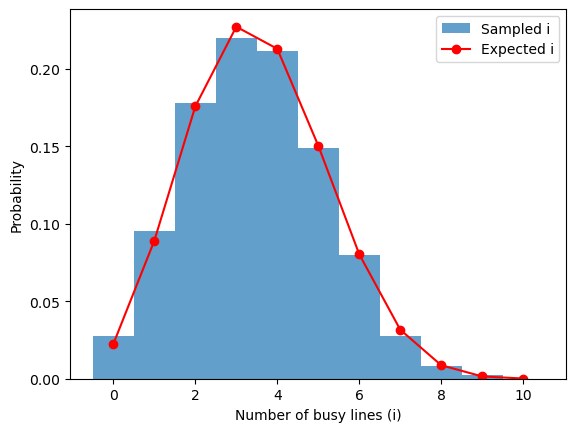

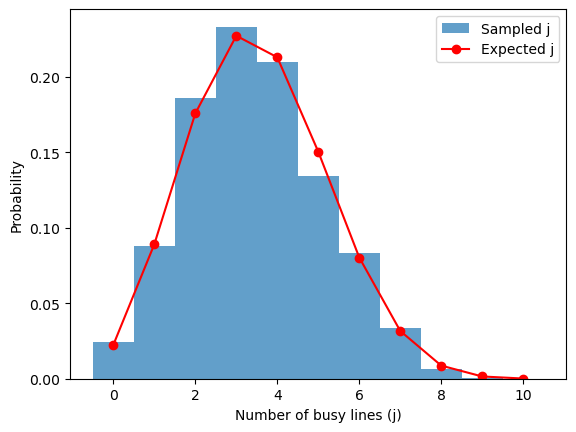

In [12]:
# Flatten samples for chi-squared test
samples_i = [s[0] for s in samples_joint]
samples_j = [s[1] for s in samples_joint]

# Calculate observed frequencies for i and j
observed_freq_i, _ = np.histogram(samples_i, bins=np.arange(m+2) - 0.5, density=True)
observed_freq_j, _ = np.histogram(samples_j, bins=np.arange(m+2) - 0.5, density=True)

# Calculate expected frequencies for i and j
expected_freq_i = np.array([sum(truncated_joint_poisson_pmf(i, j, A1, A2, m) for j in range(m + 1)) for i in range(m + 1)])
expected_freq_j = np.array([sum(truncated_joint_poisson_pmf(i, j, A1, A2, m) for i in range(m + 1)) for j in range(m + 1)])

# Perform chi-squared test for i and j
chi2_stat_i, p_value_i = chisquare(observed_freq_i, expected_freq_i)
chi2_stat_j, p_value_j = chisquare(observed_freq_j, expected_freq_j)

print("Chi-squared statistic for i:", chi2_stat_i)
print("p-value for i:", p_value_i)
print("Chi-squared statistic for j:", chi2_stat_j)
print("p-value for j:", p_value_j)

# Plot results for i
plt.hist(samples_i, bins=np.arange(m+2) - 0.5, density=True, alpha=0.7, label='Sampled i')
plt.plot(np.arange(m + 1), expected_freq_i, 'ro-', label='Expected i')
plt.xlabel('Number of busy lines (i)')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Plot results for j
plt.hist(samples_j, bins=np.arange(m+2) - 0.5, density=True, alpha=0.7, label='Sampled j')
plt.plot(np.arange(m + 1), expected_freq_j, 'ro-', label='Expected j')
plt.xlabel('Number of busy lines (j)')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [13]:
def metropolis_hastings_coordinate(p, steps):
    i, j = 0, 0
    samples = []
    for _ in range(steps):
        # Update i while keeping j fixed
        i_new = np.random.randint(0, m + 1)
        if i_new + j <= m:
            acceptance_ratio_i = min(1, p(i_new, j) / p(i, j))
            if np.random.rand() < acceptance_ratio_i:
                i = i_new
        
        # Update j while keeping i fixed
        j_new = np.random.randint(0, m + 1)
        if i + j_new <= m:
            acceptance_ratio_j = min(1, p(i, j_new) / p(i, j))
            if np.random.rand() < acceptance_ratio_j:
                j = j_new
        
        samples.append((i, j))
    return samples

# Target distribution
def target_joint(i, j):
    return truncated_joint_poisson_pmf(i, j, A1, A2, m)

# Generate samples
samples_joint_coordinate = metropolis_hastings_coordinate(target_joint, 10000)

Chi-squared statistic for i: 0.0012566540633469493
p-value for i: 1.0
Chi-squared statistic for j: 0.0023931279891997144
p-value for j: 1.0


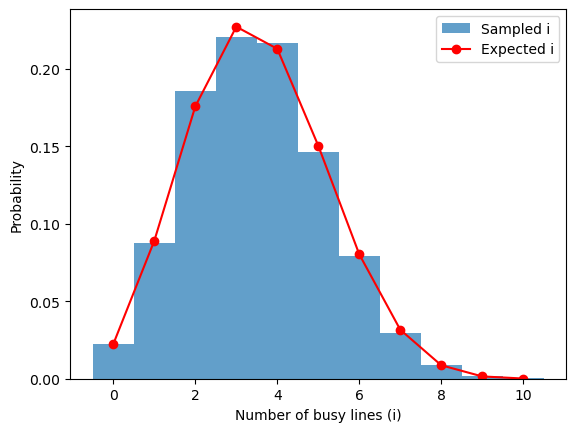

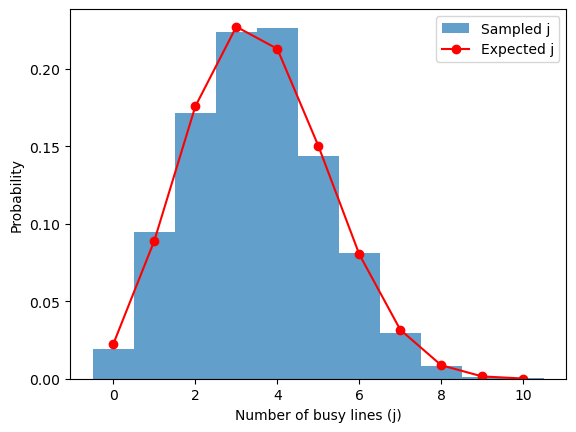

In [14]:
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Flatten samples for chi-squared test
samples_i = [s[0] for s in samples_joint_coordinate]
samples_j = [s[1] for s in samples_joint_coordinate]

# Calculate observed frequencies for i and j
observed_freq_i, _ = np.histogram(samples_i, bins=np.arange(m + 2) - 0.5, density=True)
observed_freq_j, _ = np.histogram(samples_j, bins=np.arange(m + 2) - 0.5, density=True)

# Calculate expected frequencies for i and j
expected_freq_i = np.array([sum(truncated_joint_poisson_pmf(i, j, A1, A2, m) for j in range(m + 1)) for i in range(m + 1)])
expected_freq_j = np.array([sum(truncated_joint_poisson_pmf(i, j, A1, A2, m) for i in range(m + 1)) for j in range(m + 1)])

# Perform chi-squared test for i and j
chi2_stat_i, p_value_i = chisquare(observed_freq_i, expected_freq_i)
chi2_stat_j, p_value_j = chisquare(observed_freq_j, expected_freq_j)

print("Chi-squared statistic for i:", chi2_stat_i)
print("p-value for i:", p_value_i)
print("Chi-squared statistic for j:", chi2_stat_j)
print("p-value for j:", p_value_j)

# Plot results for i
plt.hist(samples_i, bins=np.arange(m + 2) - 0.5, density=True, alpha=0.7, label='Sampled i')
plt.plot(np.arange(m + 1), expected_freq_i, 'ro-', label='Expected i')
plt.xlabel('Number of busy lines (i)')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Plot results for j
plt.hist(samples_j, bins=np.arange(m + 2) - 0.5, density=True, alpha=0.7, label='Sampled j')
plt.plot(np.arange(m + 1), expected_freq_j, 'ro-', label='Expected j')
plt.xlabel('Number of busy lines (j)')
plt.ylabel('Probability')
plt.legend()
plt.show()

## 3.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameters
A1 = 4.0
A2 = 4.0
m = 10

# Truncated Joint Poisson PMF
def truncated_joint_poisson_pmf(i, j, A1, A2, m):
    if i + j > m:
        return 0
    c = 1 / sum((A1**k / np.math.factorial(k)) * (A2**l / np.math.factorial(l)) for k in range(m + 1) for l in range(m + 1) if k + l <= m)
    return c * (A1**i / np.math.factorial(i)) * (A2**j / np.math.factorial(j))

# Gibbs Sampling
def gibbs_sampling(p, steps):
    i, j = 0, 0
    samples = []
    for _ in range(steps):
        # Sample i given j
        i_cond = [p(i, j) for i in range(m + 1) if i + j <= m]
        i_cond /= np.sum(i_cond)
        i = np.random.choice(range(m + 1), p=i_cond)
        
        # Sample j given i
        j_cond = [p(i, j) for j in range(m + 1) if i + j <= m]
        j_cond /= np.sum(j_cond)
        j = np.random.choice(range(m + 1), p=j_cond)
        
        samples.append((i, j))
    return samples

# Target distribution
def target_joint(i, j):
    return truncated_joint_poisson_pmf(i, j, A1, A2, m)

# Generate samples
samples_joint_gibbs = gibbs_sampling(target_joint, 10000)

# Flatten samples for chi-squared test
samples_i = [s[0] for s in samples_joint_gibbs]
samples_j = [s[1] for s in samples_joint_gibbs]

# Calculate observed frequencies for i and j
observed_freq_i, _ = np.histogram(samples_i, bins=np.arange(m + 2) - 0.5, density=True)
observed_freq_j, _ = np.histogram(samples_j, bins=np.arange(m + 2) - 0.5, density=True)

# Calculate expected frequencies for i and j
expected_freq_i = np.array([sum(truncated_joint_poisson_pmf(i, j, A1, A2, m) for j in range(m + 1)) for i in range(m + 1)])
expected_freq_j = np.array([sum(truncated_joint_poisson_pmf(i, j, A1, A2, m) for i in range(m + 1)) for j in range(m + 1)])

# Perform chi-squared test for i and j
from scipy.stats import chisquare

chi2_stat_i, p_value_i = chisquare(observed_freq_i, expected_freq_i)
chi2_stat_j, p_value_j = chisquare(observed_freq_j, expected_freq_j)

print("Chi-squared statistic for i:", chi2_stat_i)
print("p-value for i:", p_value_i)
print("Chi-squared statistic for j:", chi2_stat_j)
print("p-value for j:", p_value_j)

# Plot results for i
plt.hist(samples_i, bins=np.arange(m + 2) - 0.5, density=True, alpha=0.7, label='Sampled i')
plt.plot(np.arange(m + 1), expected_freq_i, 'ro-', label='Expected i')
plt.xlabel('Number of busy lines (i)')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Plot results for j
plt.hist(samples_j, bins=np.arange(m + 2) - 0.5, density=True, alpha=0.7, label='Sampled j')
plt.plot(np.arange(m + 1), expected_freq_j, 'ro-', label='Expected j')
plt.xlabel('Number of busy lines (j)')
plt.ylabel('Probability')
plt.legend()
plt.show()

/var/folders/sv/_w7_lr4s79bd9y8fpvjxy5d80000gn/T/ipykernel_34733/1730113478.py:14: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  c = 1 / sum((A1**k / np.math.factorial(k)) * (A2**l / np.math.factorial(l)) for k in range(m + 1) for l in range(m + 1) if k + l <= m)
/var/folders/sv/_w7_lr4s79bd9y8fpvjxy5d80000gn/T/ipykernel_34733/1730113478.py:15: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return c * (A1**i / np.math.factorial(i)) * (A2**j / np.math.factorial(j))


ValueError: 'a' and 'p' must have same size